##The influence of Kernel Choice on the SVM Decision Boundaries.

The Support Vector Machines (SVMs) are strong supervised learning classification models.
One of the concepts that SVMs are based on is the kernel trick that enables us to learn non-linear decision boundaries, which in fact involves implicitly mapping data in higher-dimensional spaces.

In this below notebook, we will:

Compare various kernels of SVM: linear, polynomial and RBF (Gaussian)
Imagine the process by which the decision boundary is defined by each of the kernels.
Examine the influence of such hyperparameters as C and gamma.
Talk about practices of using which kernel.
Consider some short-term ethical and practical implication of model choice.

The design of this notebook is aimed at being learning and user-friendly.
All numbers and code are supposed to explain a tutorial-like presentation that can be used in a professional academic environment.


##Learning Objectives

By the end of this notebook, you should be able to:

- Give a definition of a kernel in the context of SVMs.
- Know the difference between:
- Linear and  Polynomial kernel
- Radial Basis Function - RBF Kernel
- Visualize the decision boundaries created by different kernels.
- Understand that hyperparameters are important and include:

- C: the regularization strength

Both RBF and polynomial kernels have one parameter: gamma, which plays a similar role as the isotropic covariance parameter of the normal distribution.
- Gamma (for polar and RBF kernels) does the same job as isotropic covariance parameter in normal distribution. - Train and evaluate SVM classifiers using scikit-learn. - Reflect on how model and kernel choices might bear on considerations of fairness and interpretability in real applications.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# For reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Make plots a bit larger
plt.rcParams["figure.figsize"] = (7, 5)
plt.rcParams["axes.grid"] = True


In [2]:
# Generate a "moons" dataset (non-linear, but not to hard)
X_moons, y_moons = make_moons(n_samples=400, noise=0.25, random_state=RANDOM_STATE)

# Generate a "circles" dataset (more challenging non-linear structure)
X_circles, y_circles = make_circles(n_samples=400, factor=0.4, noise=0.1, random_state=RANDOM_STATE)

# Train test split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_moons, y_moons, test_size=0.3, random_state=RANDOM_STATE, stratify=y_moons
)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_circles, y_circles, test_size=0.3, random_state=RANDOM_STATE, stratify=y_circles
)

print("Moons dataset shapes:", X_train_m.shape, X_test_m.shape)
print("Circles dataset shapes:", X_train_c.shape, X_test_c.shape)


Moons dataset shapes: (280, 2) (120, 2)
Circles dataset shapes: (280, 2) (120, 2)


In [3]:
def plot_decision_boundary(clf, X, y, title, h=0.02):
    """
    Plot the decision boundary of a classifier in 2D.

    Parameters :
    clf : fitted classifier with predict method
    X : array-like, shape (n_samples, 2)
    y : array-like, shape (n_samples,)
    title : str, title of the plot
    h : float, step size in the meshgrid
    """
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Colour-blind-friendly colormap: use different markers as well as colours
    cmap_light = ListedColormap(["#AEC7E8", "#FFBB78"])
    cmap_bold = ["#1F77B4", "#FF7F0E"]

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_light)

    for class_value, marker in zip(np.unique(y), ["o", "s"]):
        plt.scatter(
            X[y == class_value, 0],
            X[y == class_value, 1],
            c=cmap_bold[class_value],
            edgecolor="k",
            marker=marker,
            label=f"Class {class_value}",
            alpha=0.8
        )

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()


Linear SVM (moons) - Train accuracy: 0.8107142857142857
Linear SVM (moons) - Test accuracy: 0.8916666666666667


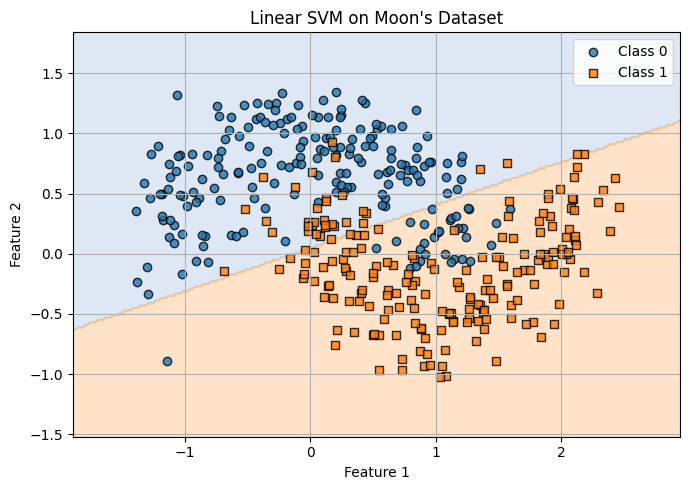

In [4]:
linear_svm_moons = SVC(kernel="linear", C=1.0, random_state=RANDOM_STATE)
linear_svm_moons.fit(X_train_m, y_train_m)

y_pred_train = linear_svm_moons.predict(X_train_m)
y_pred_test = linear_svm_moons.predict(X_test_m)

print("Linear SVM (moons) - Train accuracy:", accuracy_score(y_train_m, y_pred_train))
print("Linear SVM (moons) - Test accuracy:", accuracy_score(y_test_m, y_pred_test))

plot_decision_boundary(
    linear_svm_moons, X_moons, y_moons,
    title="Linear SVM on Moon's Dataset"
)


RBF SVM (moons) - Train accuracy: 0.9392857142857143
RBF SVM (moons) - Test accuracy: 0.9333333333333333


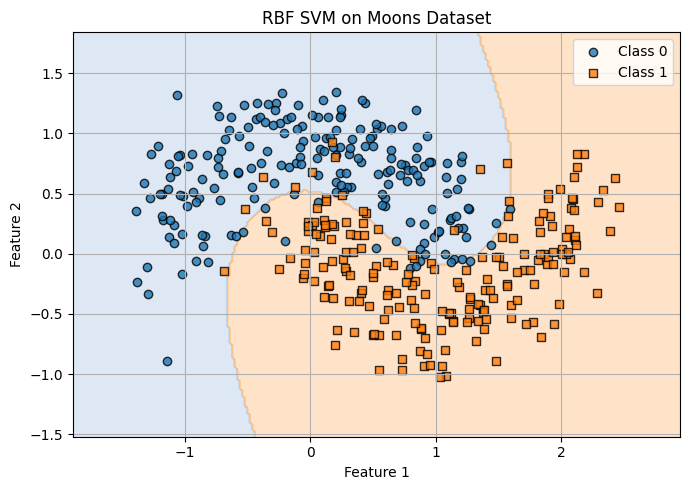

In [5]:
rbf_svm_moons = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=RANDOM_STATE)
rbf_svm_moons.fit(X_train_m, y_train_m)

y_pred_train_rbf = rbf_svm_moons.predict(X_train_m)
y_pred_test_rbf = rbf_svm_moons.predict(X_test_m)

print("RBF SVM (moons) - Train accuracy:", accuracy_score(y_train_m, y_pred_train_rbf))
print("RBF SVM (moons) - Test accuracy:", accuracy_score(y_test_m, y_pred_test_rbf))

plot_decision_boundary(
    rbf_svm_moons, X_moons, y_moons,
    title="RBF SVM on Moons Dataset"
)


Polynomial SVM (degree=3, moons) - Train accuracy: 0.7678571428571429
Polynomial SVM (degree=3, moons) - Test accuracy: 0.8333333333333334


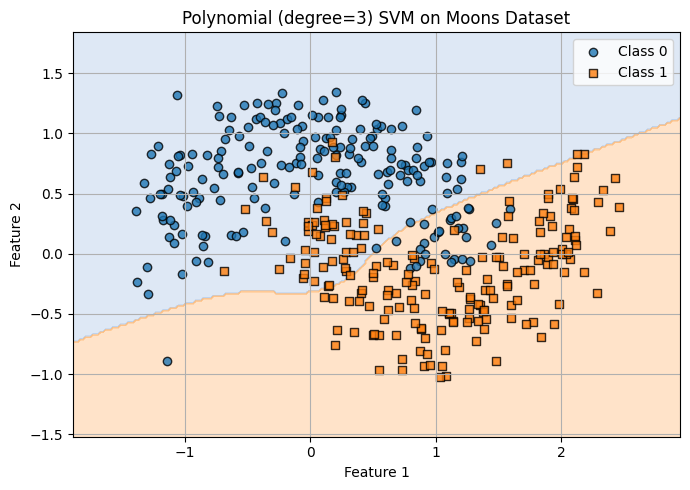

In [6]:
poly_svm_moons = SVC(kernel="poly", degree=3, C=1.0, gamma="scale", random_state=RANDOM_STATE)
poly_svm_moons.fit(X_train_m, y_train_m)

y_pred_train_poly = poly_svm_moons.predict(X_train_m)
y_pred_test_poly = poly_svm_moons.predict(X_test_m)

print("Polynomial SVM (degree=3, moons) - Train accuracy:", accuracy_score(y_train_m, y_pred_train_poly))
print("Polynomial SVM (degree=3, moons) - Test accuracy:", accuracy_score(y_test_m, y_pred_test_poly))

plot_decision_boundary(
    poly_svm_moons, X_moons, y_moons,
    title="Polynomial (degree=3) SVM on Moons Dataset"
)


##Kernels Comparison on Kernels on the Moons Dataset.

Based on the visualisations, you are expected to observe:

Linear kernel is not good with curvilinear boundaries.
The RBF kernel conforms itself to the non-linear structure.
Non-linear boundaries can also be modeled by the use of the polynomial kernel but:
- Attentively tuning of the degree and other hyperparameters.
- May fits or develops an excessively complicated boundary.

We shall sum up their accuracies in figures.

In [7]:
import pandas as pd

results_moons = pd.DataFrame({

    "Kernel": ["Linear", "RBF", "Polynomial (deg=3)"],
    "Train Accuracy":
    [
        accuracy_score(y_train_m, y_pred_train),
        accuracy_score(y_train_m, y_pred_train_rbf),
        accuracy_score(y_train_m, y_pred_train_poly),
    ],
    "Test Accuracy": [
        accuracy_score(y_test_m, y_pred_test),
        accuracy_score(y_test_m, y_pred_test_rbf),
        accuracy_score(y_test_m, y_pred_test_poly),
    ],
})

results_moons


,Kernel,Train Accuracy,Test Accuracy
0,Linear,0.810714,0.891667
1,RBF,0.939286,0.933333
2,Polynomial (deg=3),0.767857,0.833333


Linear SVM (circles) - Test accuracy: 0.5916666666666667


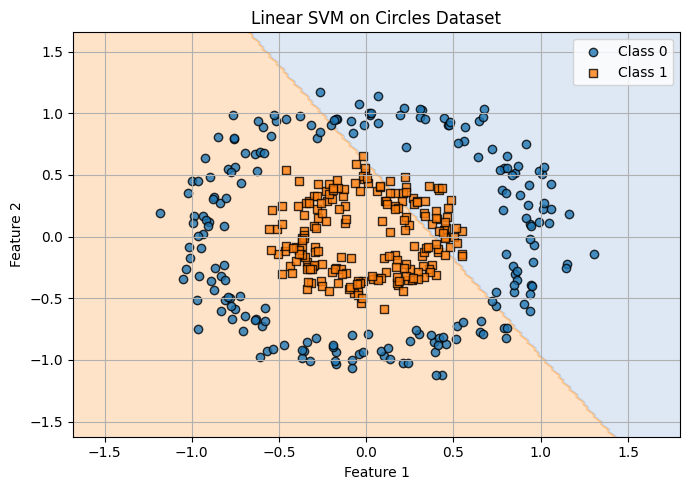

RBF SVM (circles) - Test accuracy: 1.0


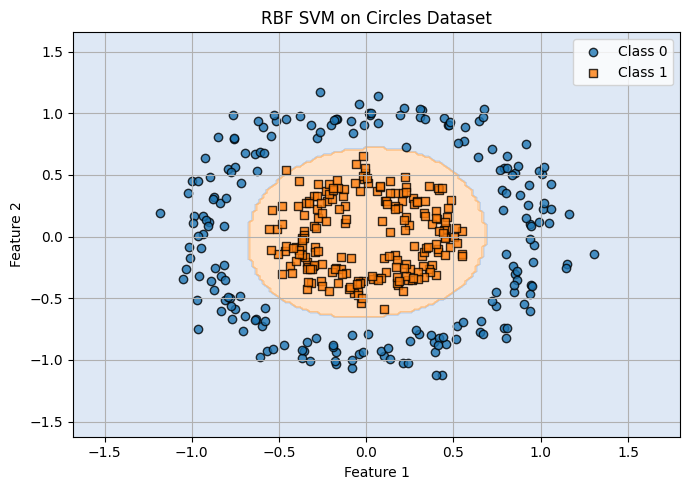

In [8]:
# Linear SVM on circles
linear_svm_circles = SVC(kernel="linear", C=1.0, random_state=RANDOM_STATE)
linear_svm_circles.fit(X_train_c, y_train_c)

print("Linear SVM (circles) - Test accuracy:",
      accuracy_score(y_test_c, linear_svm_circles.predict(X_test_c)))

plot_decision_boundary(
    linear_svm_circles, X_circles, y_circles,
    title="Linear SVM on Circles Dataset"
)

# RBF SVM on circles
rbf_svm_circles = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=RANDOM_STATE)
rbf_svm_circles.fit(X_train_c, y_train_c)

print("RBF SVM (circles) - Test accuracy:",
      accuracy_score(y_test_c, rbf_svm_circles.predict(X_test_c)))

plot_decision_boundary(
    rbf_svm_circles, X_circles, y_circles,
    title="RBF SVM on Circles Dataset"
)


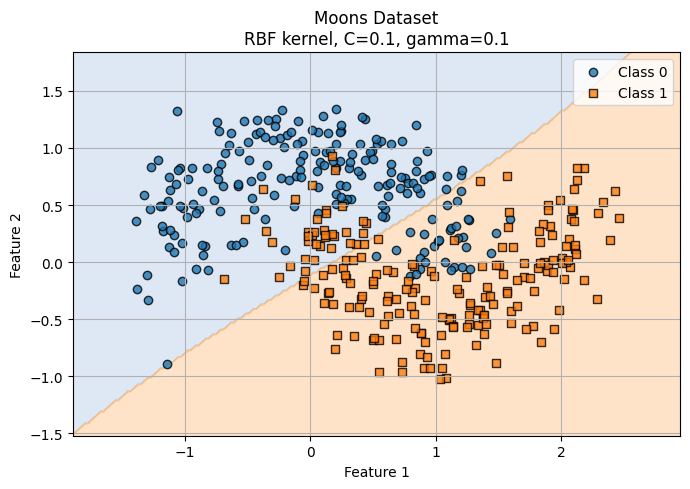

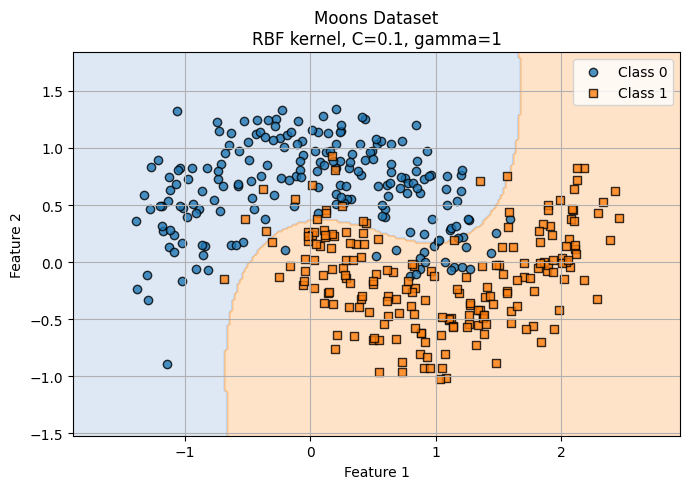

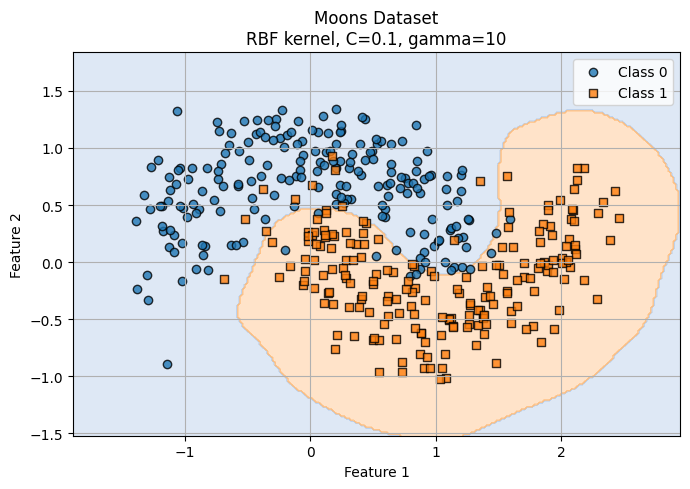

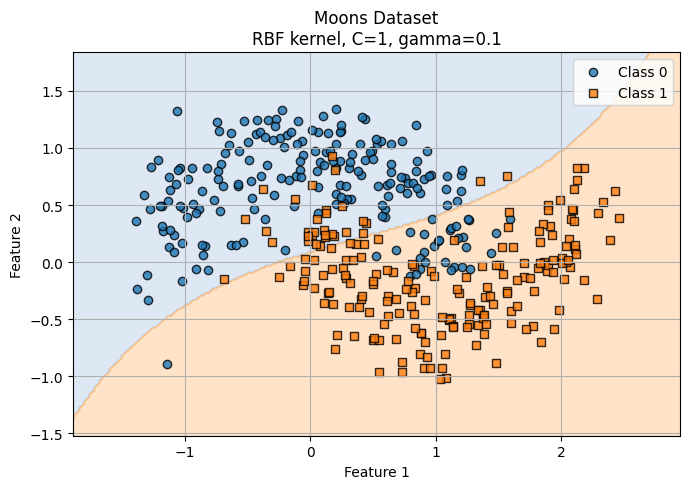

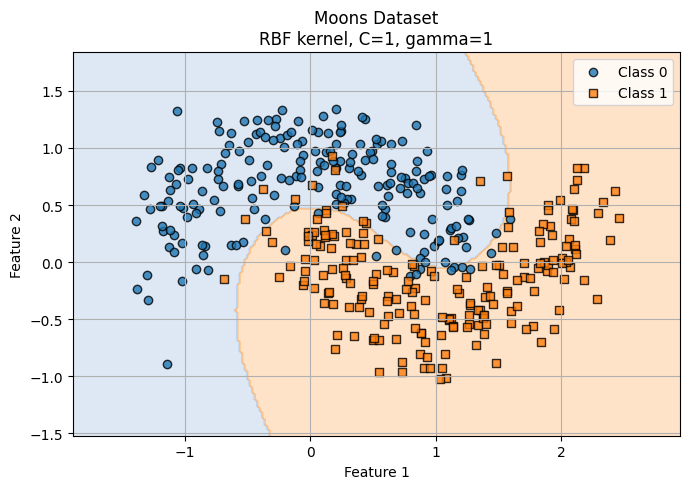

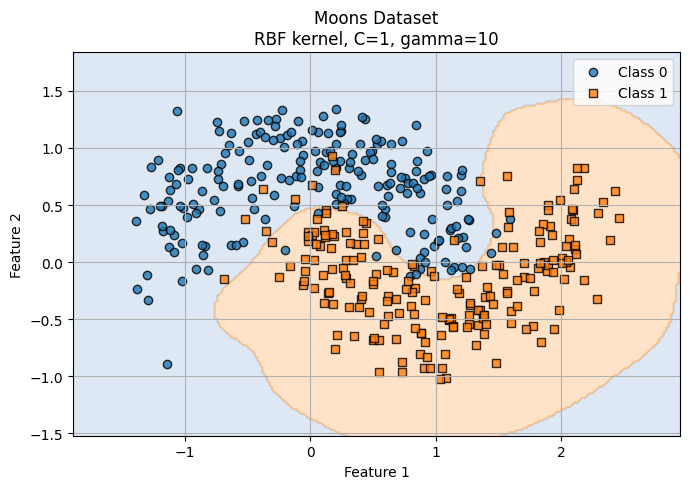

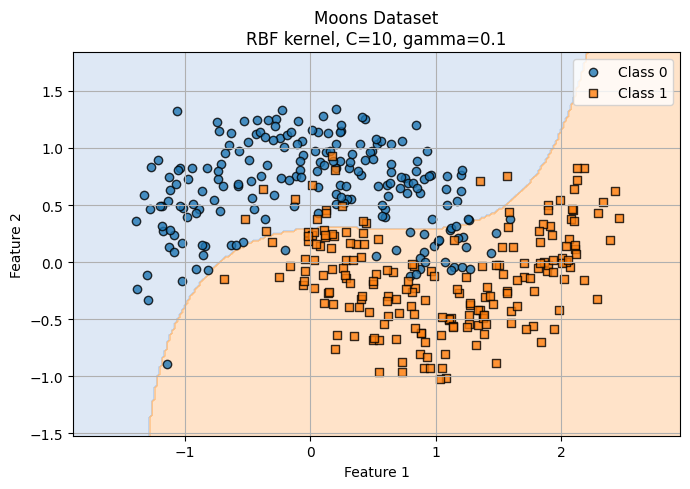

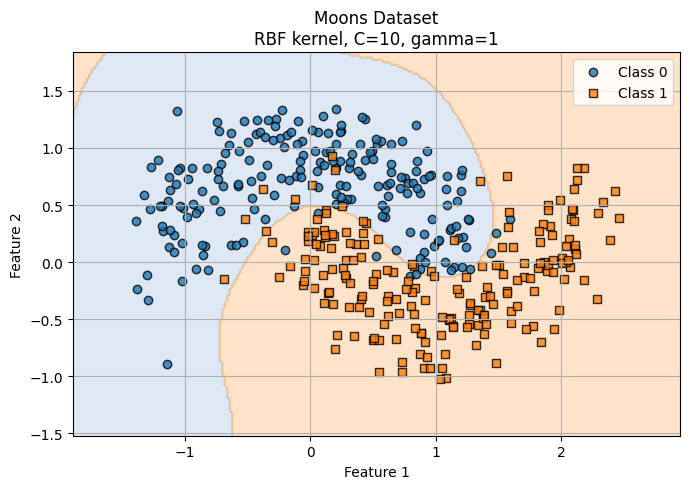

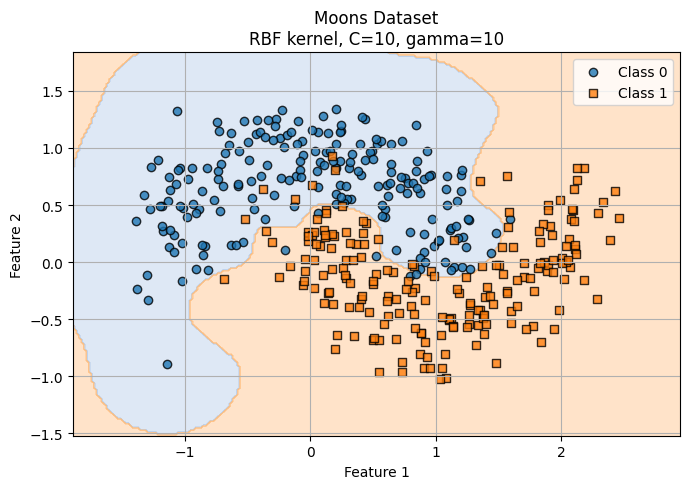

In [9]:
def train_and_plot_rbf(C, gamma, X, y, title_prefix):
    svm = SVC(kernel="rbf", C=C, gamma=gamma, random_state=RANDOM_STATE)
    svm.fit(X, y)
    title = f"{title_prefix}\nRBF kernel, C={C}, gamma={gamma}"
    plot_decision_boundary(svm, X, y, title=title)

# Try a few combinations on the moons dataset
for C in [0.1, 1, 10]:
    for gamma in [0.1, 1, 10]:
        train_and_plot_rbf(C, gamma, X_moons, y_moons, title_prefix="Moons Dataset")


##Theoretical Summary What does the kernel do?

The objective of an SVM is to find a decision boundary, also called a hyperplane that maximizes the margin between classes.

However, when the data are not linearly separable in the original feature space, we can use a **kernel function.

A kernel computes implicitly the inner product in a (possibly very high dimensional) feature space without ever computing the map explicitly:
\\\ [

K(x, x') = \\langle \\phi(x), \\phi(x') \\rangle

]
Common kernels:

- **Linear**: \\\\(K(x, x') = x^\\top x'\\\\)

- **Polynomial**: \\\\(K(x, x') = (\gamma x^\top x' + r)^d\\\\)

- **RBF (Gaussian)**: \\\\(K(x, x') = \exp(-\gamma \|x - x'\|^2)\\\\) Hyperparameters - **C** controls the trade-off between margin size and misclassifications. - **gamma** (for RBF, Poly) controls how far the influence of a single training example reaches. Choosing a kernel effectively chooses the geometry of the decision boundary.

## Ethical and Practical Considerations

Although toy datasets are harmless, in real-world applications SVMs (with various kernels) can be applied to:

- Credit scoring
- Medical diagnosis
- Hiring or admissions decisions

Important considerations:

- Different kernels and hyperparameters can change **who** is classified into which group.
- Overfitting to biased data can amplify existing inequalities.
- Non-linear kernels (e.g. RBF) may be **less interpretable** than linear models, making it harder to justify decisions to affected individuals.

Good practice includes:

- Evaluating performance separately across subgroups (fairness analysis)
- Choosing simpler, more interpretable kernels when appropriate
- Documenting model choices and their potential impact

Kernel choice is not just a technical decision; it can influence people’s lives when models are deployed in sensitive domains.


## References

You can cite, for example:

- Cortes, C. & Vapnik, V. (1995). *Support-vector networks*. Machine Learning.
- Bishop, C. M. (2006). *Pattern Recognition and Machine Learning*. Springer.
- scikit-learn documentation on SVM: https://scikit-learn.org/stable/modules/svm.html



